#### Crop Recommendation Project

Based on predicted rainfall, soil contents and weather parameters the system will recommend the most suitable crop for cultivation.
The user needs to provide Nitrogen, Phosperous, Potassium ratio in soil, temperature(C), humidity(%), rainfall(in cm), ph value of soil to get recommended crop.

Crop prediction is an essential task for the decision-makers at national and regional levels for rapid decision-making. An accurate crop yield prediction model can help farmers to decide on what to grow and when to grow. The dataset contains following 21 crops: ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']

In [ ]:
# importing modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# import test - train functions
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import LabelEncoder

# importing models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  # suppport vector machine
from sklearn.ensemble import RandomForestClassifier

: 

Data Preprocessing

In [ ]:
# Read data from csv
df= pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.shape

(2200, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
# Checking for null values 
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

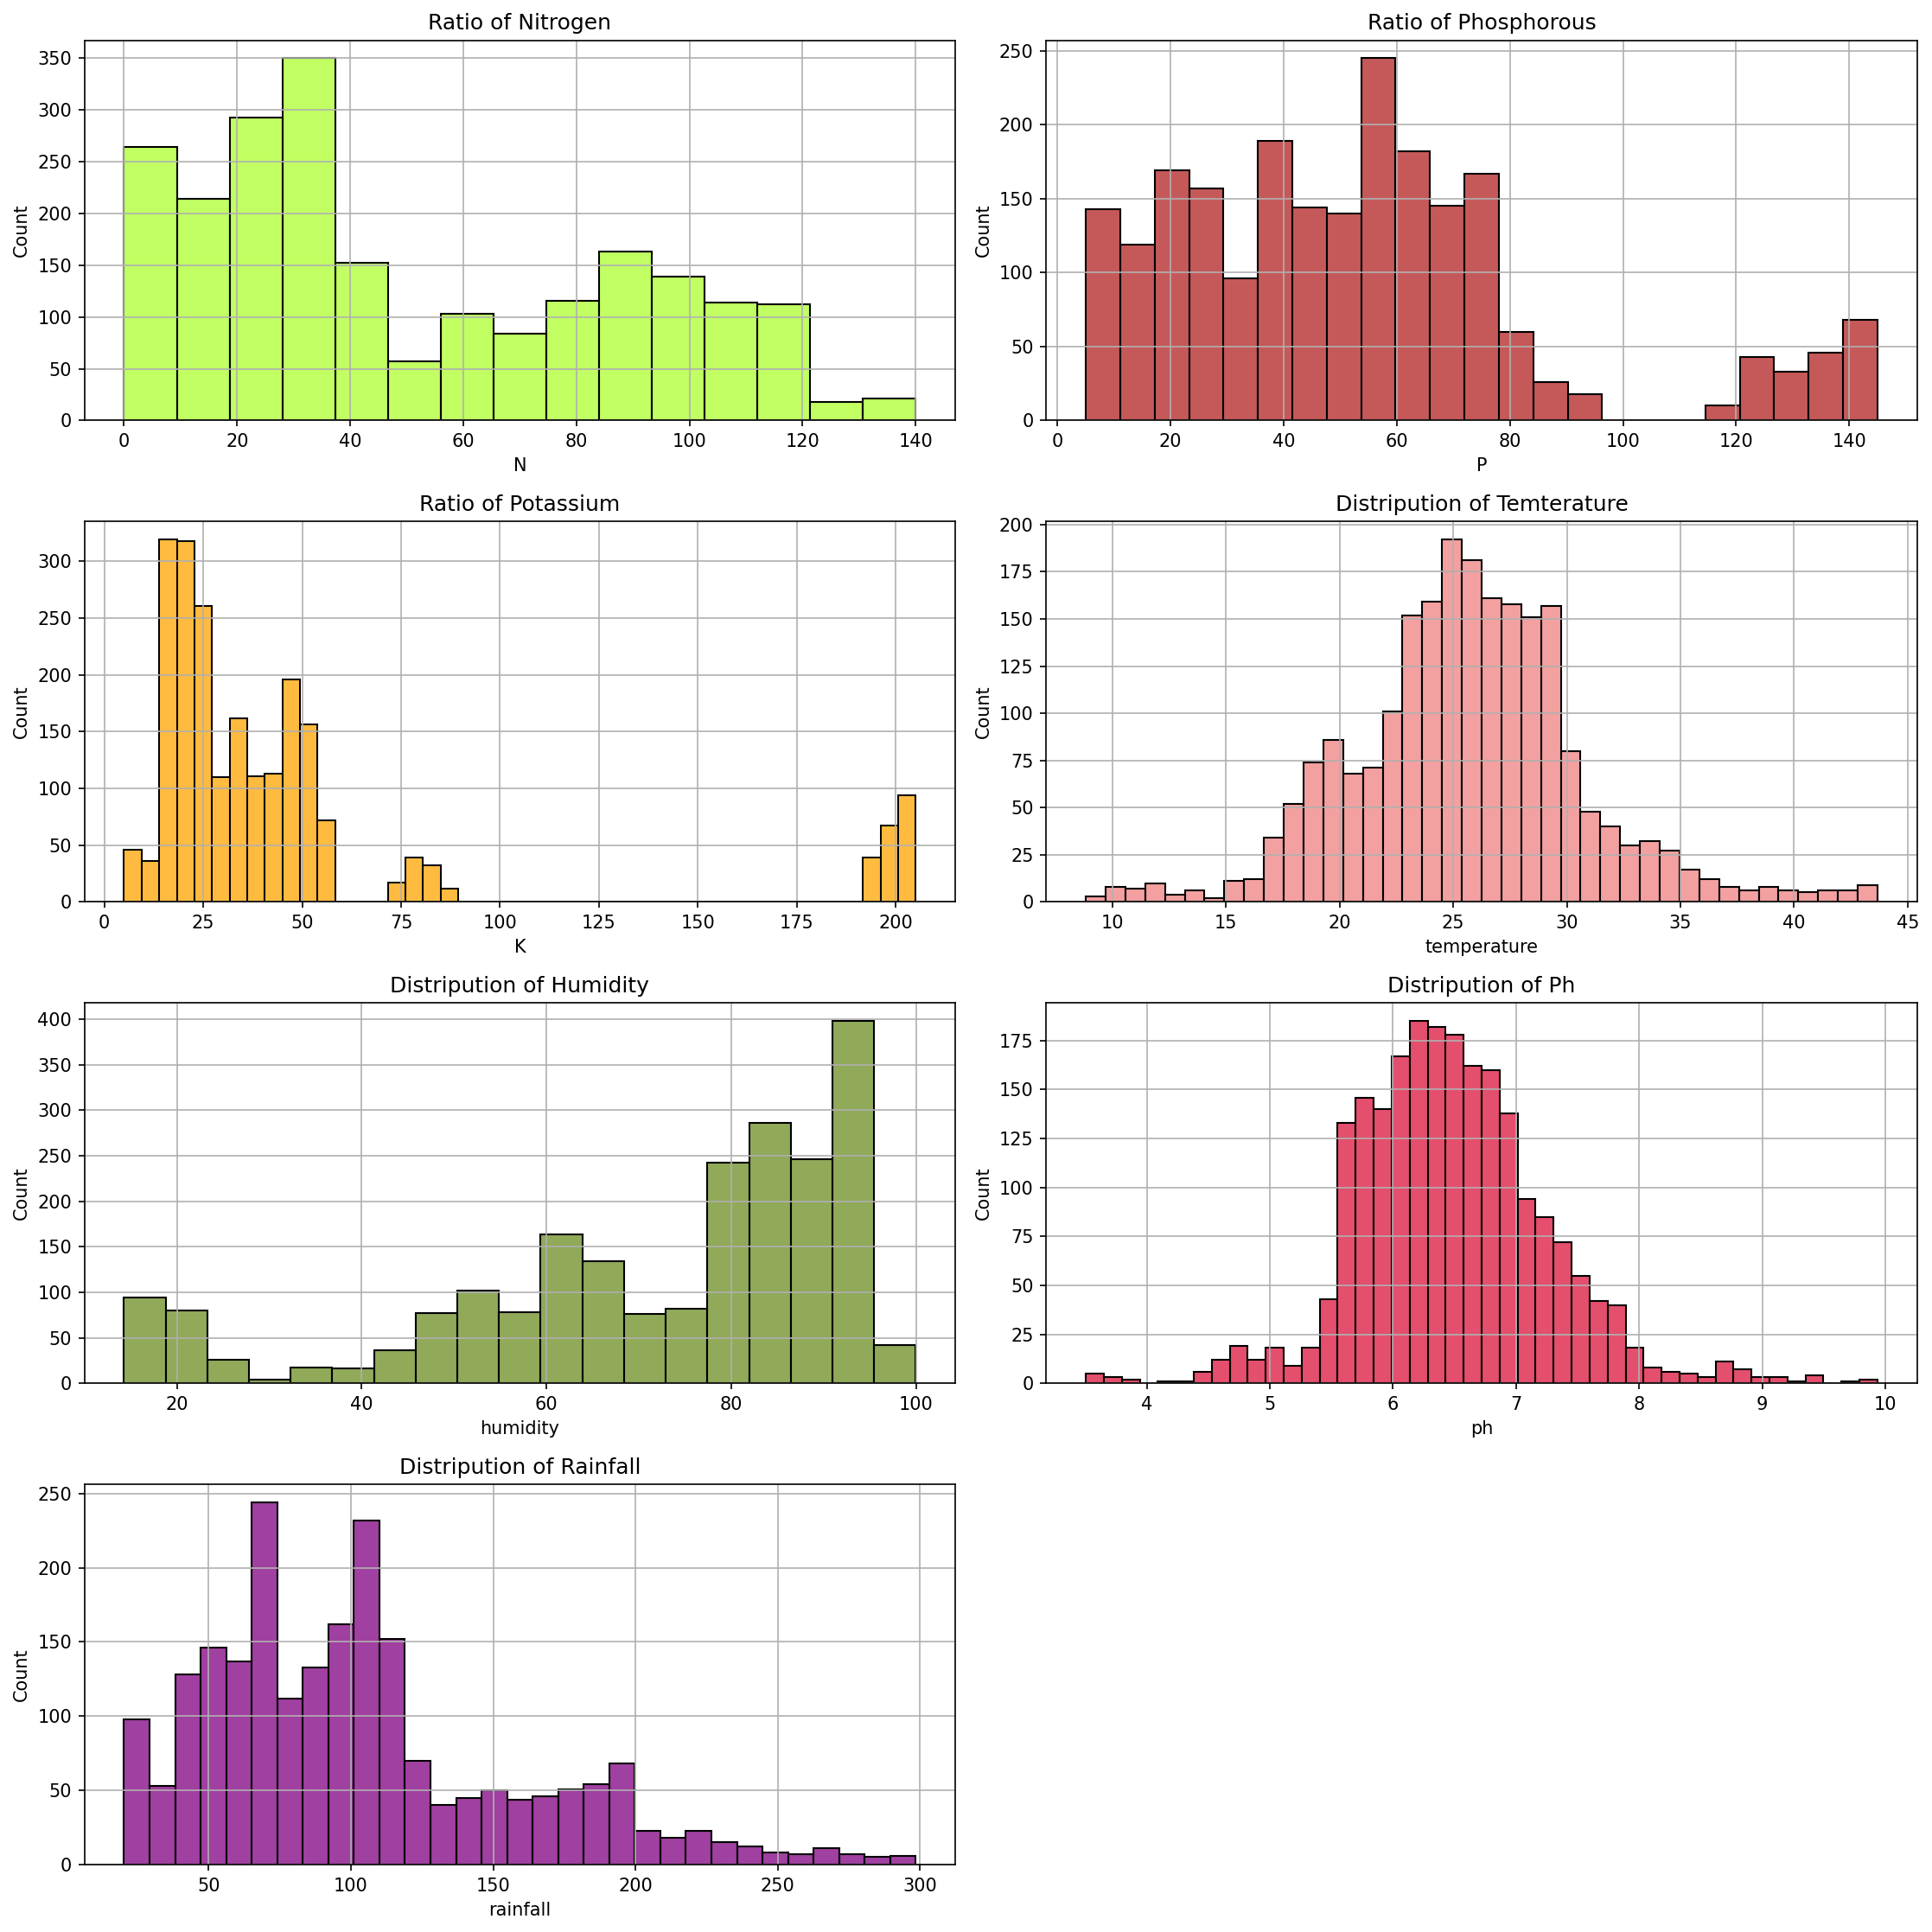

In [ ]:
# Plotting distribution plot of various attributes.

plt.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['figure.dpi'] = 150

# ratio of Nitrogen content in soil
plt.subplot(4, 2, 1)
sns.histplot(df['N'], color='greenyellow')
plt.title('Ratio of Nitrogen', fontsize = 12)
plt.tight_layout()
plt.grid()

# ratio of Phosphorous content in soil
plt.subplot(4, 2, 2)
sns.histplot(df['P'], color='firebrick')
plt.title('Ratio of Phosphorous', fontsize = 12)
plt.tight_layout()
plt.grid()

# ratio of Potassium content in soil
plt.subplot(4, 2, 3)
sns.histplot(df['K'], color = 'orange')
plt.title('Ratio of Potassium', fontsize = 12)
plt.tight_layout()
plt.grid()

# temperature in degree Celsius
plt.subplot(4, 2, 4)
sns.histplot(df['temperature'], color = 'lightcoral')
plt.title('Distripution of Temterature', fontsize = 12)
plt.tight_layout()
plt.grid()

# humidity - relative humidity in %
plt.subplot(4, 2, 5)
sns.histplot(df['humidity'], color = 'olivedrab')
plt.title('Distripution of Humidity', fontsize = 12)
plt.tight_layout()
plt.grid()

# ph - ph value of the soil
plt.subplot(4, 2, 6)
sns.histplot(df['ph'], color = 'crimson')
plt.title('Distripution of Ph', fontsize = 12)
plt.tight_layout()
plt.grid()

# rainfall - rainfall in mm
plt.subplot(4, 2, 7)
sns.histplot(df['rainfall'], color = 'purple')
plt.title('Distripution of Rainfall', fontsize = 12)
plt.tight_layout()
plt.grid()

In [ ]:
# Separating target(Label) from df
input_df = df.drop('label',axis='columns')
input_df.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [ ]:
# Checking for wrong values(1)
# % humidity cannot be more then 100%
input_df[input_df.humidity >100]

,N,P,K,temperature,humidity,ph,rainfall


In [ ]:
# Checking for wrong values(2)
# PH level of soil cannot be more than 14
input_df[input_df.ph >14]

,N,P,K,temperature,humidity,ph,rainfall


In [ ]:
# Putting target(Label) to another dataframe
label_df = pd.DataFrame()
label_df['label'] = df['label']
label_df.head()


,label
0,rice
1,rice
2,rice
3,rice
4,rice


In [ ]:
# Applying label encoding on label_df
le = LabelEncoder()
label_df['label_le'] = le.fit_transform(label_df['label'])
label_df

,label,label_le
0,rice,20
1,rice,20
2,rice,20
3,rice,20
4,rice,20
...,...,...
2195,coffee,5
2196,coffee,5
2197,coffee,5
2198,coffee,5


In [ ]:
# Converting to csv
label_df.to_csv('Crop_Label.csv')

In [ ]:
# Finding range of levels
print("Minimum label number=",label_df['label_le'].min())
print("Maximum label number=",label_df['label_le'].max())
print("Number of plants = ",label_df['label_le'].max()+1)

Minimum label number= 0
Maximum label number= 21
Number of plants =  22


In [ ]:
distinct_plants = label_df['label'].unique()
distinct_plants

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

Checking cross val score to compare models

In [ ]:
LR_SCORE = cross_val_score(LogisticRegression(solver='sag', max_iter=1000),input_df,label_df['label_le'])
LR_SCORE
# solver='sag' is recommended for larger datasets.
# Increasing max_iter slows down performance.

C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([0.96363636, 0.96363636, 0.97045455, 0.96590909, 0.95681818])

In [ ]:
SVM_SCORE =cross_val_score(SVC(),input_df,label_df.label_le)
SVM_SCORE

array([0.98409091, 0.97954545, 0.97954545, 0.97272727, 0.975     ])

In [ ]:
RF_SCORE = cross_val_score(RandomForestClassifier(),input_df,label_df.label_le)
RF_SCORE

array([0.99545455, 0.98863636, 0.99545455, 0.99318182, 0.98863636])

In [ ]:
# Calculating Average score/accuracy
print("Averge Score of Logistic Regression=",sum(LR_SCORE)/len(LR_SCORE))
print("Averge Score of SVM=",sum(SVM_SCORE)/len(SVM_SCORE))
print("Averge Score of Random forest=",sum(RF_SCORE)/len(RF_SCORE))

Averge Score of Logistic Regression= 0.9640909090909091
Averge Score of SVM= 0.9781818181818182
Averge Score of Random forest= 0.9922727272727272


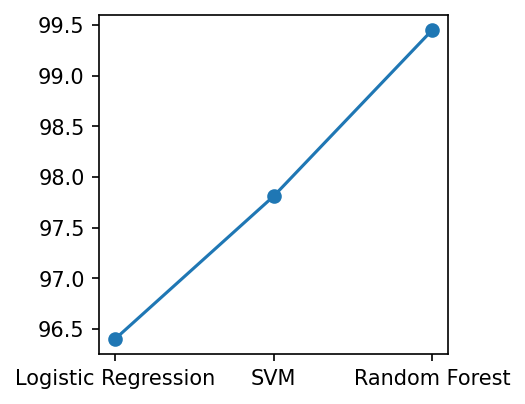

In [ ]:
plt.rcParams["figure.figsize"] = (3,3)
a1=[99.45,97.81,96.40][::-1]
a2=['Random Forest','SVM','Logistic Regression'][::-1]
plt.plot(a2,a1,marker="o")

**Conclusion** :- Therefore Random forest has the maximum accuracy(99%) followed by Support Vector Machine(97%) followed by Logistic Regession(96%). All three models have accuracy more than 96%.

In [ ]:
# Training the random forest classifier
X_train, X_test, y_train, y_test = train_test_split(input_df, label_df.label_le, test_size=0.33)
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)
RFC.score(X_test,y_test)

0.9958677685950413

In [ ]:
# Predicting the values.

# Write the values...
Nitrogen_level = 92
Phospheros_level = 7
Potassium_level = 45
Temperature = 28
Humidity = 81
Soil_Ph = 5.57
Rainfall = 117.66

input = [Nitrogen_level,Phospheros_level,Potassium_level,Temperature,Humidity,Soil_Ph,Rainfall]
plant = RFC.predict([input])
plant = plant[0]

final_plant = label_df[label_df.label_le == plant]['label'].unique()[0]

print("Recommended crop for the following inputs should be",final_plant)


Recommended crop for the following inputs should be banana


C:\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


<h4 style="text-align:center">Thank You<h4>